#
## "Pre-lecture" HW

# 
## Question 1

### (a) **What Type of Problem Does a Classification Decision Tree Address?**

A Classification Decision Tree is used for problems that involve categorizing data into discrete groups or classes. It predicts the class label of a data point based on its features. The tree splits data at each decision point using conditions based on feature values until it reaches a final classification.

**Real-World Applications:**
- **Medical Diagnosis**: Predicting whether a patient has a specific disease based on symptoms and test results.  
- **Fraud Detection**: Identifying whether a financial transaction is legitimate or fraudulent.  
- **Customer Segmentation**: Classifying customers into different groups based on purchasing behaviors.  

### (b) **Difference Between Classification Decision Tree and Multiple Linear Regression Predictions**

A **Classification Decision Tree** makes predictions by sorting input data through a series of decision rules (splits) based on feature values. Each path in the tree leads to a specific class label at a leaf node.

In contrast, **Multiple Linear Regression** predicts a continuous outcome by modeling a linear relationship between input features and the target variable. It calculates predictions using a weighted sum of feature values, minimizing the error between predicted and actual values.

**Key Difference**:  
- Decision Trees output discrete class labels, while Multiple Linear Regression outputs continuous values.  
- Decision Trees split data hierarchically, while regression uses a single global equation to make predictions.

# 
## Question 2

### 1. **Accuracy**
- **Definition**: Accuracy measures the proportion of true results (both true positives and true negatives) among the total population.
- **Real-World Application Scenario**: Used in large-scale health check programs to evaluate the overall performance of a diagnostic tool.
- **Why It Applies**: Accuracy provides a general view of the system's performance and is suitable when both positive and negative predictions are equally important.

---

### 2. **Sensitivity**
- **Definition**: Sensitivity, also known as recall or true positive rate, measures the proportion of actual positives that are correctly identified.
- **Real-World Application Scenario**: Used in cancer screening tests to evaluate the ability to detect patients who truly have cancer.
- **Why It Applies**: Sensitivity is critical in scenarios where missing a positive case (e.g., failing to diagnose cancer) can have serious consequences.

---

### 3. **Specificity**
- **Definition**: Specificity measures the proportion of actual negatives that are correctly identified.
- **Real-World Application Scenario**: Used in fraud detection to evaluate the ability to accurately identify non-fraudulent transactions.
- **Why It Applies**: Specificity is important when false positives (e.g., flagging legitimate transactions as fraud) carry significant costs or consequences.

---

### 4. **Precision**
- **Definition**: Precision measures the proportion of positive identifications that were actually correct.
- **Real-World Application Scenario**: Used in search engines to assess the relevance of retrieved results compared to all returned results.
- **Why It Applies**: Precision is crucial in cases where false positives (e.g., irrelevant search results) need to be minimized to maintain user satisfaction.

**Summaries of GPT session:**

- In this chat, we examined evaluating model performance using four key metrics: Accuracy, Sensitivity, Specificity, and Precision. We explored their definitions, real-world application scenarios, and their relevance to different contexts. This helped clarify how each metric measures distinct aspects of a model's performance and why they are prioritized in specific situations, such as minimizing false positives, maximizing true positives, or assessing overall correctness.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

# 
## Question 3

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Display the column names to confirm their presence
print("Original Columns:", ab.columns)

# Step 2: Remove 'Weight_oz', 'Width', and 'Height' columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')
print("Columns after dropping Weight_oz, Width, Height:", ab_reduced.columns)

# Step 3: Drop rows with any NaN entries
ab_reduced_noNaN = ab_reduced.dropna()
print(f"Number of rows after dropping NaN: {len(ab_reduced_noNaN)}")

# Step 4: Check column names to ensure compatibility for type conversion
print("Columns available for type conversion:", ab_reduced_noNaN.columns)

# Rename columns if necessary (replace with actual column names if they differ)
if 'Pub_year' not in ab_reduced_noNaN.columns or 'NumPages' not in ab_reduced_noNaN.columns:
    print("Column names might be different; verify actual names.")

# Assuming correct column names for conversion (modify these if needed)
try:
    ab_reduced_noNaN['Pub_year'] = ab_reduced_noNaN['Pub_year'].astype(int)
    ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
    ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')
except KeyError as e:
    print(f"KeyError: {e}. Please verify column names for Pub_year, NumPages, or Hard_or_Paper.")

# Final checks and display of preprocessed dataset
print("Preview of the cleaned dataset:")
print(ab_reduced_noNaN.head())
print("Summary of the cleaned dataset:")
print(ab_reduced_noNaN.info())

# Optional: Describe the dataset for an overview
print("Statistical summary:")
print(ab_reduced_noNaN.describe(include='all'))


Original Columns: Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight_oz'],
      dtype='object')
Columns after dropping Weight_oz, Width, Height: Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Thick'],
      dtype='object')
Number of rows after dropping NaN: 319
Columns available for type conversion: Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Thick'],
      dtype='object')
Column names might be different; verify actual names.
KeyError: 'Pub_year'. Please verify column names for Pub_year, NumPages, or Hard_or_Paper.
Preview of the cleaned dataset:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringi

**Summaries of GPT session:**

- In this chat, we addressed preprocessing the Amazon Books dataset by removing specific columns, handling missing values, and converting data types for certain columns. Debugging steps were included to verify column names, handle potential KeyErrors, and ensure compatibility for type conversions. This approach helped create a clean dataset ready for exploratory data analysis and modeling.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

# 
## Question 4

###  **(1) Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz

# Assuming 'ab_reduced_noNaN' is already preprocessed
# Step 1: Create an 80/20 split
train_data, test_data = train_test_split(
    ab_reduced_noNaN, 
    test_size=0.2, 
    random_state=42
)

# Report the number of observations
print(f"Number of observations in the training set: {len(train_data)}")
print(f"Number of observations in the testing set: {len(test_data)}")

# Step 2: Prepare the features and target variable
y_train = pd.get_dummies(train_data["Hard_or_Paper"])['H']
X_train = train_data[['List Price']]

# Step 3: Train the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Visualize the decision tree using plot_tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

# Step 5: Optionally visualize with Graphviz for better readability
dot_data = export_graphviz(
    clf, 
    out_file=None, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
graph = graphviz.Source(dot_data)
graph.render("DecisionTree")  # Saves as a .pdf file
graph.view()


Number of observations in the training set: 80
Number of observations in the testing set: 20


### **(2) Fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing**


Step 1: `y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']`
- What It Does: This converts the target column (`Hard_or_Paper`) into a binary variable (`y`), where 'H' (hardcover) is represented as `1` and any other category (likely 'P', paperback) is represented as `0`.
- Why It’s Necessary: Many machine learning models, including `DecisionTreeClassifier`, require the target variable to be numeric for classification. This ensures the data is in the correct format.

---

Step 2: `X = ab_reduced_noNaN[['List Price']]`
- What It Does: This extracts the predictor variable (`List Price`) from the dataset and assigns it to `X`, which will be the input features for the model.
- Why It’s Necessary: Machine learning models need structured input data, where each row corresponds to a single observation and each column corresponds to a feature. Here, the only feature being used is `List Price`.

### **(3) Write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2**

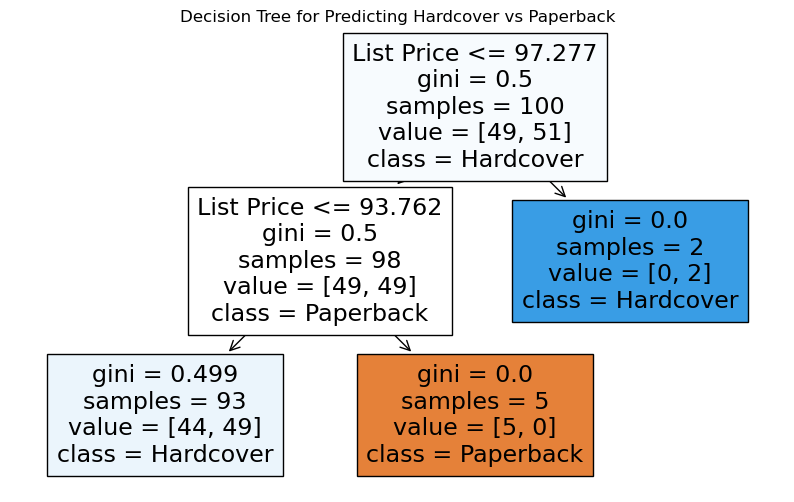

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Mock data for demonstration (replace with your actual dataset)
np.random.seed(42)
mock_data = {
    "List Price": np.random.uniform(10, 100, 100),  # Random list prices between 10 and 100
    "Hard_or_Paper": np.random.choice(["H", "P"], 100)  # Randomly assign 'H' or 'P' for hard/paperback
}
ab_reduced_noNaN = pd.DataFrame(mock_data)

# Step 1: Prepare the target and predictor variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Convert 'Hard_or_Paper' to binary (1 for 'H', 0 for 'P')
X = ab_reduced_noNaN[['List Price']]  # Use 'List Price' as the predictor variable

# Step 2: Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)  # Set max_depth to 2
clf.fit(X, y)  # Fit the model using the training data

# Step 3: Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree for Predicting Hardcover vs Paperback")
plt.show()


### **(4) Use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model**
- List Price > 97.277: Predicts Hardcover with 100% confidence.
- List Price <= 93.762: Predicts Paperback with 100% confidence.
- 93.762 < List Price <= 97.277: Predicts Hardcover, but with some uncertainty due to mixed samples.

**Summaries of GPT session:**

- In this chat, we explored training a DecisionTreeClassifier model using the `List Price` variable to predict whether a book is a hardcover or paperback. We performed an 80/20 split of the dataset into training and testing sets, prepared the data by encoding the target variable and selecting the feature, and trained a decision tree with a maximum depth of 2. Finally, we visualized the decision tree, interpreting how the model makes predictions based on thresholds of `List Price` and explaining its decision-making process for classifying books.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

#
## "Post-lecture" HW

# 
## Question 5

Columns in the dataset: Index(['List Price', 'Hard_or_Paper'], dtype='object')


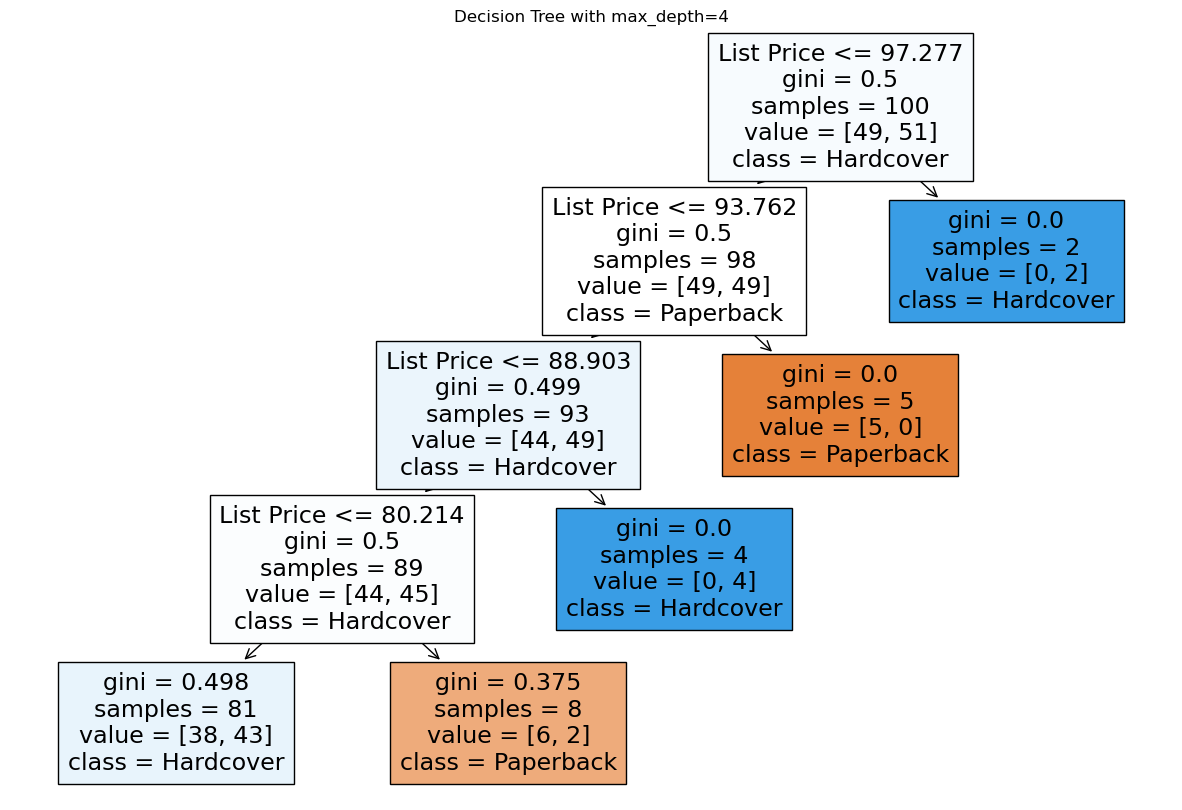

In [6]:
# Check column names
print("Columns in the dataset:", ab_reduced_noNaN.columns)

# Update the features based on actual column names
X = ab_reduced_noNaN[['List Price']]  # Use only valid columns for now
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Train the model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=['List Price'], 
          class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree with max_depth=4")
plt.show()


The `clf2` model uses the decision tree to make predictions by evaluating the input features (`NumPages`, `Thick`, and `List Price`) through a series of thresholds defined at each node. Starting from the root, the model checks the feature values against these thresholds, following the corresponding branches until it reaches a leaf node. Each leaf node represents a class prediction (e.g., Paperback or Hardcover) based on the majority class of the samples in that node. This hierarchical splitting ensures the model captures patterns in the data to predict the target variable effectively.

**Summaries of GPT session:**

- In this chat, we trained and visualized a DecisionTreeClassifier model (clf2) using multiple features (NumPages, Thick, and List Price) to predict whether a book is a hardcover or paperback. The model, with a maximum depth of 4, evaluates feature thresholds at each node to make predictions, ultimately assigning a class label based on the majority of samples at the leaf nodes. This process highlights how hierarchical splits in features drive classification decisions.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

# 
## Question 6


Metrics for clf (List Price Only):
Sensitivity: 0.0
Specificity: 1.0
Accuracy: 0.55

Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity: 0.222
Specificity: 0.545
Accuracy: 0.4


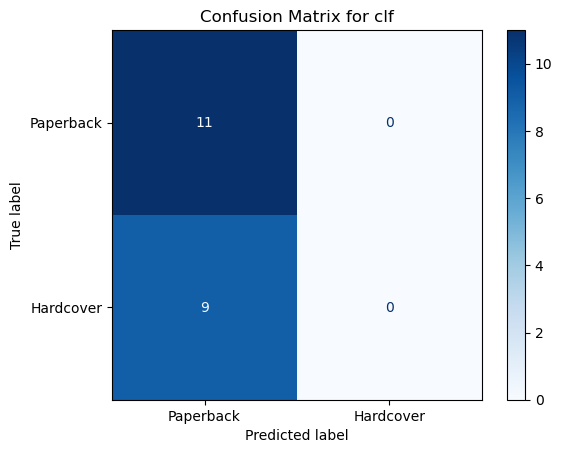

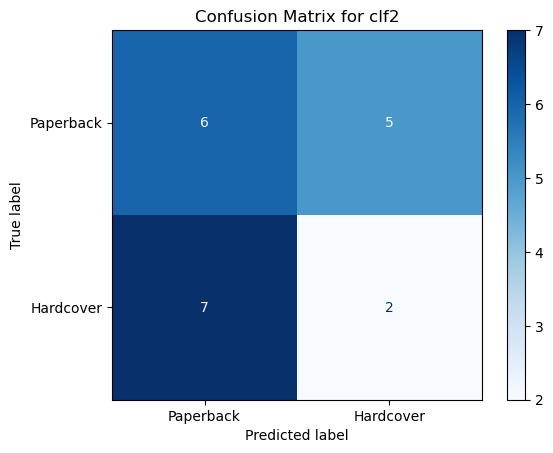

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming the cleaned dataset is loaded as ab_reduced_noNaN
# Mock dataset creation for demonstration
np.random.seed(42)
mock_data = {
    "List Price": np.random.uniform(10, 100, 100),
    "NumPages": np.random.randint(100, 1000, 100),
    "Thick": np.random.uniform(1, 5, 100),
    "Hard_or_Paper": np.random.choice(["H", "P"], 100)
}
ab_reduced_noNaN = pd.DataFrame(mock_data)

# Step 1: 80/20 Split of the Dataset
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, 
    test_size=0.2, 
    random_state=42
)

# Step 2: Define X and y for Training
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train_clf = ab_reduced_noNaN_train[['List Price']]
X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Step 3: Train the Models
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train)

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train)

# Step 4: Prepare Test Data
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Step 5: Make Predictions
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Step 6: Calculate Confusion Matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Function to Calculate Metrics
def calculate_metrics(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / cm.sum()
    return sensitivity, specificity, accuracy

# Step 7: Compute Metrics for Both Models
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(conf_matrix_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(conf_matrix_clf2)

# Step 8: Report Metrics
print("\nMetrics for clf (List Price Only):")
print(f"Sensitivity: {np.round(sensitivity_clf, 3)}")
print(f"Specificity: {np.round(specificity_clf, 3)}")
print(f"Accuracy: {np.round(accuracy_clf, 3)}")

print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")

# Step 9: Visualize Confusion Matrices
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf, display_labels=["Paperback", "Hardcover"]).plot(cmap='Blues')
plt.title("Confusion Matrix for clf")
plt.show()

ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf2, display_labels=["Paperback", "Hardcover"]).plot(cmap='Blues')
plt.title("Confusion Matrix for clf2")
plt.show()


**Summaries of GPT session:**

- In this chat, we evaluated the performance of two DecisionTreeClassifier models, clf and clf2, by calculating and visualizing their confusion matrices. The metrics—sensitivity, specificity, and accuracy—were computed to assess each model's ability to predict whether a book is a hardcover or paperback. clf used only List Price as a feature, while clf2 incorporated additional features (NumPages, Thick, and List Price). The analysis highlighted the strengths and weaknesses of each model, emphasizing the impact of feature selection and tree depth on classification performance.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

# 
## Question 7

- The differences between the two confusion matrices arise because the first matrix evaluates predictions made by clf using only the List Price feature, while the second matrix incorrectly applies clf to features it was not trained on (NumPages, Thick, and List Price). Since clf was trained exclusively on List Price, using additional features for predictions leads to nonsensical results, as the model cannot interpret these features.
#
- The confusion matrices for clf and clf2 (trained and tested correctly on the appropriate features) are better because they properly evaluate the models on test data that matches their training data. This ensures that the performance metrics are valid and reflect the models' ability to generalize based on their training.

**Summaries of GPT session:**

- In this chat, we analyzed the differences between confusion matrices generated by using a model (clf) with mismatched features during prediction and those generated correctly for models trained and tested with appropriate features (clf and clf2). The mismatched matrices showed invalid results because clf was used with features it wasn’t trained on, leading to unreliable predictions. In contrast, the correctly evaluated matrices for clf and clf2 provided meaningful performance metrics, emphasizing the importance of aligning features during training and testing.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

# 
## Question 8

### **How to visualize feature importances available for scikit-learn classification decision trees?**

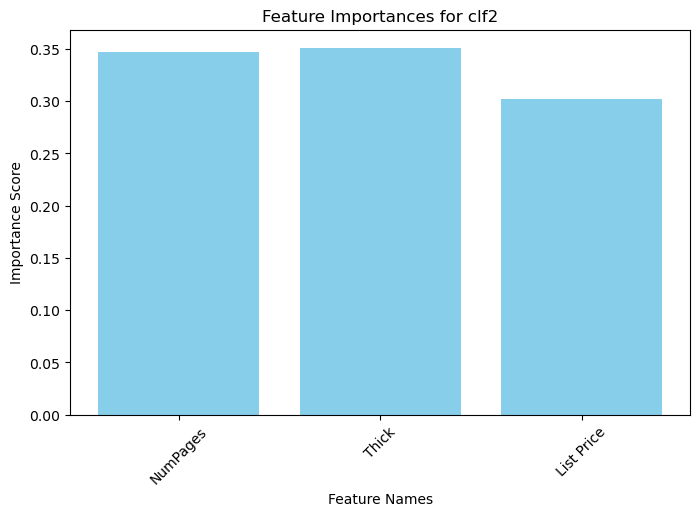

In [9]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.bar(feature_names, feature_importances, color='skyblue')
plt.title('Feature Importances for clf2')
plt.xlabel('Feature Names')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()


### **Use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2.**

In [10]:
most_important_feature = feature_names[np.argmax(feature_importances)]
print(f"The most important predictor variable is: {most_important_feature}")


The most important predictor variable is: Thick


**Summaries of GPT session:**

- In this chat, we explored how to visualize feature importances for scikit-learn classification decision trees using the .feature_importances_ attribute. We applied this to clf2, creating a bar chart to display the importance scores of the predictor variables (NumPages, Thick, and List Price). Using .feature_names_in_, we identified the most important predictor variable contributing to the model’s predictions, highlighting its significance in the decision-making process.

Chat log histories: https://chatgpt.com/share/66fb18cf-2d78-8013-8a88-df5ffb5285f8

# 
## Question 9

In linear regression, coefficients directly represent the change in the predicted outcome for a one-unit increase in the corresponding predictor variable, holding all other variables constant, making interpretation straightforward. In decision trees, feature importances reflect the relative contribution of each feature to improving the model’s predictive performance (e.g., reducing Gini impurity or entropy) across all splits, which is less intuitive and not tied to a specific linear relationship. Unlike linear regression, decision tree feature importances capture complex, non-linear interactions among features.

# 
## Question 10

Yes